Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-05-14 00:16:46--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-05-14 00:16:46--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-05-14 00:16:46 (51.9 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

In [6]:
#RTA: CustomerID nos da el número único que identifica a cada usuario
#RTA: Gender nos dice si el usuario es hombre o mujer
#RTA: Age nos habla de la edad en años que tiene cada usuario
#RTA: Annual Income nos da los ingresos anual en miles de cada usuario
#RTA: Spending Score supongo que es una puntuación que se le da a cada usuario dependiendo de cuánto gasta

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [7]:
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

In [8]:
X = data[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



RTA: La normalización es una técnica que nos ayuda a ajustar los valores de un conjunto de datos para que estén en un rango similar,
y es importante aplicarlo porque si los datos tienen escalas muy diferentes, los que tengan valores más grandes
tendrán mucho mayor influencia en el cálculo de la distancia de las Kmedias

Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


In [10]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)

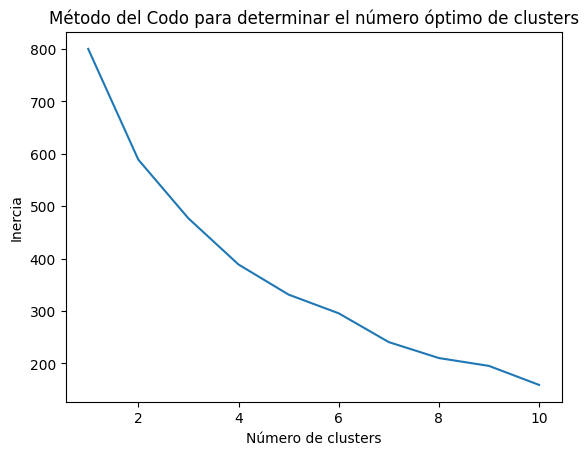

In [11]:
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()

In [12]:
wcss = []

In [13]:
for i in range(1, 11): # Probaremos desde 1 hasta 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10) # n_init para evitar warnings
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_) # inertia_ es la suma de los cuadrados intra-cluster


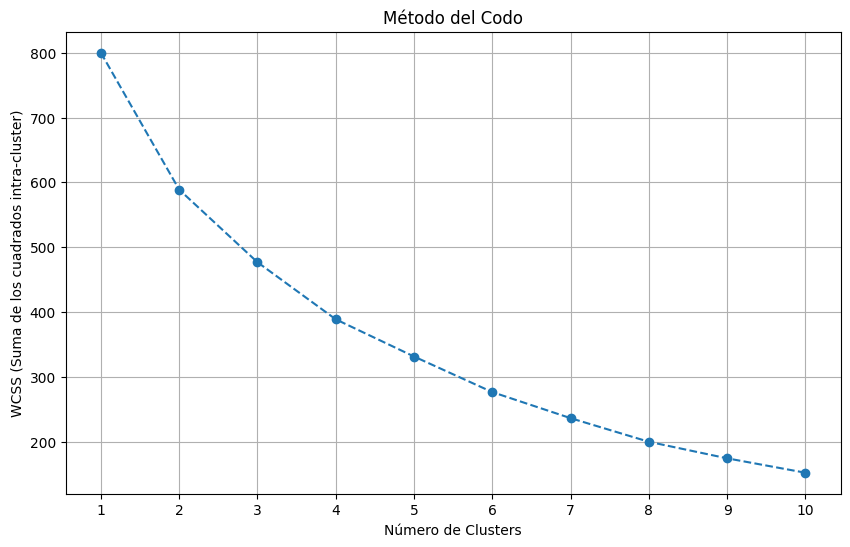

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS (Suma de los cuadrados intra-cluster)')
plt.xticks(range(1, 11)) # Asegura que el eje x muestre números enteros de 1 a 10
plt.grid(True)
plt.show()

Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

In [44]:
#RTA: El número apropiado de clusters para este ejercicio es 8 ya que es ahí en donde empieza a surgir el codo y reducir la distancia o diferencia entre clusters

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [45]:
n_clusters_optimo = 8

In [46]:
kmeans = KMeans(n_clusters=n_clusters_optimo, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)

In [47]:
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0           1       0   19                  15                      39   
1           2       0   21                  15                      81   
2           3       1   20                  16                       6   
3           4       1   23                  16                      77   
4           5       1   31                  17                      40   

   Cluster  
0        3  
1        3  
2        7  
3        4  
4        4  


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

In [48]:
data['Cluster'].value_counts()

,count
Cluster,
1,41
7,32
0,27
3,24
6,22
5,21
2,18
4,15


RTA: Vemos que están distribuidos de manera que en los extremos son aquellos que guardan más cantidad de datos, pero en realidad no es muy inequtativa la cantidad entre los clusters en general

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [51]:
cluster_description = data.groupby('Cluster').mean()

In [52]:
cluster_description

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,69.555556,0.000000,58.037037,47.629630,38.851852
1,82.219512,1.000000,51.804878,52.609756,37.073171
2,160.444444,0.000000,33.277778,87.111111,82.666667
3,56.083333,0.000000,25.250000,41.250000,60.916667
4,23.000000,1.000000,26.200000,26.000000,76.533333
5,163.333333,1.000000,32.190476,86.047619,81.666667
6,165.545455,0.136364,39.272727,90.045455,15.045455
7,100.000000,1.000000,29.406250,60.406250,41.468750


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Vemos que el promedio de edad en todos los grupos es relativamente jóven, pues el mayor es el 0 con edad de 58. En cuanto a ingreso anual vemos una gran diferencia entre el 6 con promedio de 90k y el 4 que llega apenas a 26k. Y para finalizar, en Spending Score vemos que es muy relativo ya que hay unos muy altos y otros bastante bajos como el 6, que a pesar de ser aquellos que en promedio ganan más son los que menor puntaje de gasto tienen.

Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

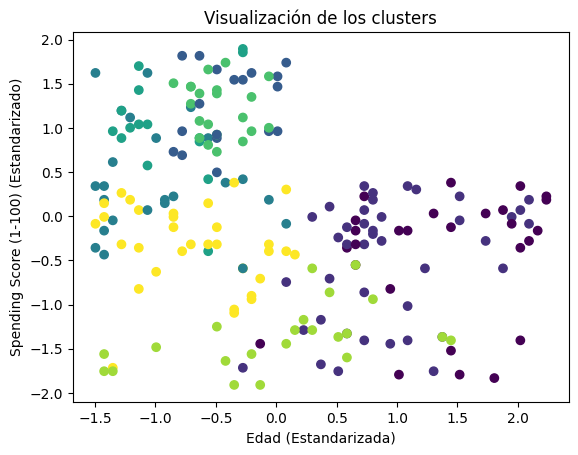

In [53]:
plt.scatter(X_scaled[:, 1], X_scaled[:, 3], c=data['Cluster'], cmap='viridis')
plt.xlabel('Edad (Estandarizada)')
plt.ylabel('Spending Score (1-100) (Estandarizado)')
plt.title('Visualización de los clusters')
plt.show()


Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?

RTA: La verdad no, siento que hay grupos que están bastante mezclados entre sí;  pues volviendo a correr todo el código, para que haya una separación clara de grupos sería escoger 2 clusters


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.